#  **Basic Setup installing libraries& getting the data**

In [ ]:
!pip install torch torchvision matplotlib tqdm pillow==11.0.0 -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 643.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 142.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0

In [ ]:
!git clone https://github.com/EyadAlN3imi/DS372-Forensics.git

Cloning into 'DS372-Forensics'...
remote: Enumerating objects: 666, done.
remote: Counting objects: 100% (666/666), done.
remote: Compressing objects: 100% (612/612), done.
remote: Total 666 (delta 55), reused 628 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (666/666), 4.30 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Filtering content: 100% (331/331), 16.55 MiB | 1014.00 KiB/s, done.


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from torchvision import transforms
import seaborn as sns
from PIL import Image, ImageOps
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = "/content/DS372-Forensics/Datasets/BPA_DATA"
os.listdir(data_path)

['FINAL_ALL_DATA.csv', 'FINAL_ALL_IMAGES']

# **Exploratory data analysis for Blood Pattern analysis**
1.1. Basic Setup – Load Images + CSV

In [ ]:
df = pd.read_csv('/content/DS372-Forensics/Datasets/BPA_DATA/FINAL_ALL_DATA.csv')
df

,image_name,class,source_dataset
0,C1_beat.jpg,beating,beating
1,C10_beat.jpg,beating,beating
2,C11_beat.jpg,beating,beating
3,C12_beat.jpg,beating,beating
4,C2_beat.jpg,beating,beating
...,...,...,...
326,9-675.jpg,blood drip,paper75
327,9-775.jpg,blood drip,paper75
328,9-875.jpg,blood drip,paper75
329,9-975.jpg,blood drip,paper75


In [ ]:
img_dir = os.path.join(data_path, "FINAL_ALL_IMAGES")
total_size_bytes = 0
for img_name in df['image_name']:
    img_path = os.path.join(img_dir, img_name)
    if os.path.exists(img_path):
        total_size_bytes += os.path.getsize(img_path)

total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total images storage size: {total_size_mb:.2f} MB")

Total images storage size: 16.55 MB


1.2. Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_name      331 non-null    object
 1   class           331 non-null    object
 2   source_dataset  331 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
image_name,331,331,1-107575.jpg,1
class,331,3,blood drip,202
source_dataset,331,4,paper75,101


1.3. Frequency Table + Percent + Cumulative Percent

In [ ]:
freq_table = pd.DataFrame({
    'Count': df['class'].value_counts(),
    'Percentage': df['class'].value_counts(normalize=True) * 100
})

freq_table['Cumulative %'] = freq_table['Percentage'][::-1].cumsum()[::-1].round(2)
freq_table['Percentage'] = freq_table['Percentage'].round(2)

freq_table

,Count,Percentage,Cumulative %
class,,,
blood drip,202,61.03,100.00
gun shot,68,20.54,38.97
beating,61,18.43,18.43


1.4. show the class distribution  

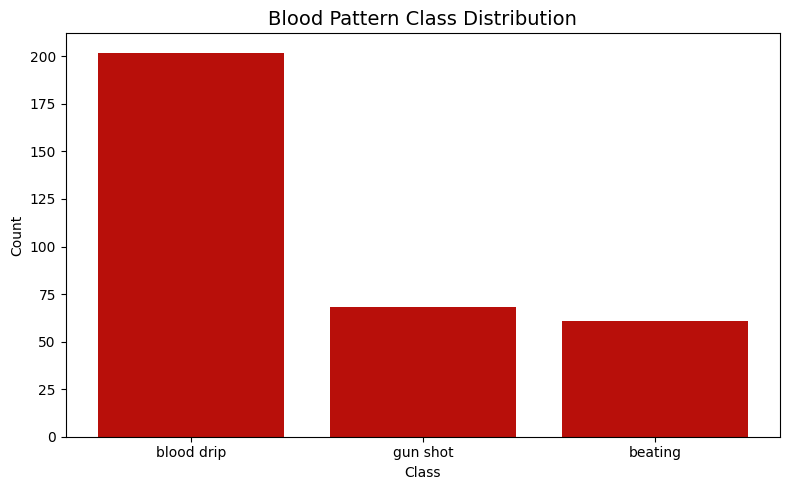

In [ ]:
counts = df['class'].value_counts()

plt.figure(figsize=(8, 5))

plt.bar(counts.index, counts.values, color="#B80F0A")

plt.title("Blood Pattern Class Distribution", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()

plt.show()

1.5. Show Random Samples Per Class

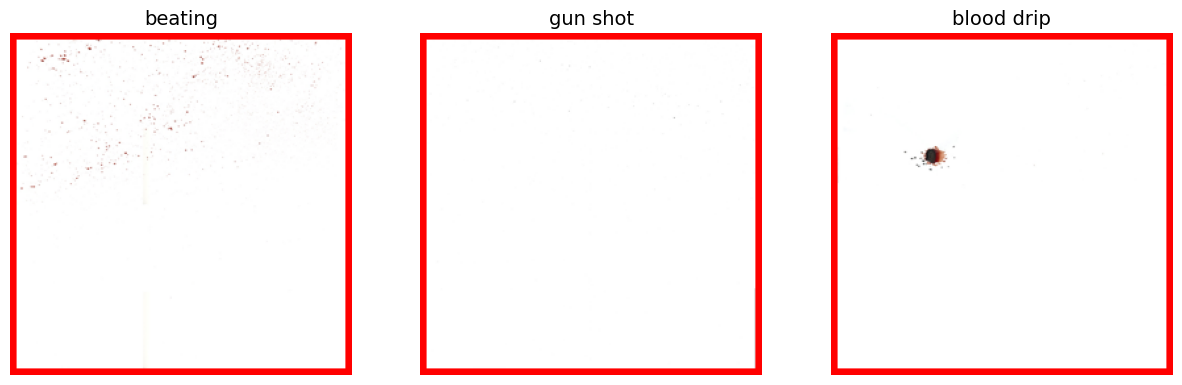

In [ ]:
classes = df['class'].unique()

fig, ax = plt.subplots(1, len(classes), figsize=(5 * len(classes), 6))

for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    img_name = subset.sample(1)['image_name'].values[0]
    path = os.path.join(img_dir, img_name)

    img = Image.open(path).resize((250, 250))

    img = ImageOps.expand(img, border=5, fill="red")

    ax[i].imshow(img)
    ax[i].set_title(cls, fontsize=14)
    ax[i].axis("off")

plt.subplots_adjust(wspace=0.2)
plt.show()


# Embedding Extraction & Dimensionality Reduction

1.6. Loading embeddings model

In [ ]:
dino_model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
dino_model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

def get_dino_embedding(img_path):
    img = Image.open(img_path).convert("RGB")
    img = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        emb = dino_model(img)
    return emb.cpu().numpy().flatten()

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall16_pretrain.pth


100%|██████████| 82.7M/82.7M [00:00<00:00, 294MB/s]


1.7. Extract embeddings

In [ ]:
embeddings = []
labels = []

print(f"Processing {len(df)} images...")
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(img_dir, row['image_name'])
    label = row['class']

    emb = get_dino_embedding(img_path)
    embeddings.append(emb)
    labels.append(label)

embeddings = np.array(embeddings)
labels = np.array(labels)

print(f"\nEmbeddings extracted")
print(f"  - Shape: {embeddings.shape}")
print(f"  - Embedding dimension: {embeddings.shape[1]}")

Processing 331 images...


100%|██████████| 331/331 [00:57<00:00,  5.76it/s]


Embeddings extracted
  - Shape: (331, 384)
  - Embedding dimension: 384


1.8. Normalize the embeddings

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings)

print(f"✓ Features normalized")
print(f"  - Shape: {X_scaled.shape}")
print(f"  - Mean: {X_scaled.mean(axis=0)[:5]}...")
print(f"  - Std: {X_scaled.std(axis=0)[:5]}...")

✓ Features normalized
  - Shape: (331, 384)
  - Mean: [ 1.2605212e-08 -3.5474667e-08 -8.0043094e-08  8.6683343e-08
  9.5799614e-08]...
  - Std: [0.99999994 1.0000001  1.0000001  0.9999998  0.99999994]...


1.9. t-SNE to 3D

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_scaled = pca.fit_transform(embeddings)

pca_df = pd.DataFrame({
    'PC1': X_scaled[:, 0],
    'PC2': X_scaled[:, 1],
    'Class': labels
})

fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Class',
    title='Interactive PCA Visualization',
    hover_data=['Class'],
    opacity=0.8
)

fig.update_traces(marker=dict(size=6))
fig.show()


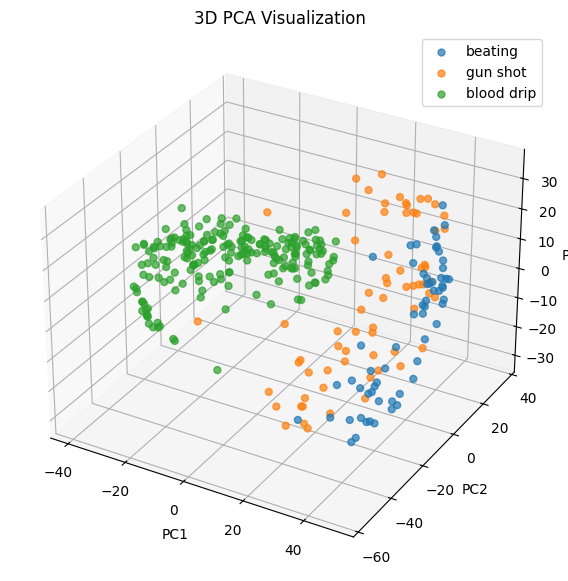

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_scaled = pca.fit_transform(embeddings)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cls in classes:
    mask = labels == cls
    ax.scatter(X_scaled[mask, 0], X_scaled[mask, 1], X_scaled[mask, 2], s=25, label=cls, alpha=0.7)

ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend()
plt.show()


In [ ]:
pca = PCA(n_components=1)
pc1 = pca.fit_transform(embeddings).flatten()

df_pc1 = pd.DataFrame({
    "PC1": pc1,
    "Class": labels})
pc1_by_class = {cls: df_pc1[df_pc1["Class"] == cls]["PC1"].values for cls in np.unique(labels)}

pc1_by_class


{np.str_('beating'): array([46.221493, 39.13618 , 34.028915, 33.02904 , 41.88764 , 43.738976,
        46.800953, 44.96954 , 46.52514 , 46.625484, 42.752922, 32.64889 ,
        45.150463, 40.418438, 41.558857, 39.133213, 40.844208, 28.320007,
        32.622677, 29.876728, 34.077038, 23.685453, 36.895237, 34.570335,
        46.327156, 45.1252  , 45.737453, 46.308758, 45.623356, 47.149624,
        44.5896  , 24.534267, 23.164047, 31.221607, 36.492256, 42.18864 ,
        39.67761 , 41.67803 , 45.54538 , 49.569798, 48.27335 , 46.431084,
        45.398888, 41.541344, 47.23907 , 44.512634, 40.422832, 41.61214 ,
        34.47756 , 44.64875 , 45.74241 , 43.93338 , 46.83016 , 37.186928,
        37.166027, 45.67697 , 34.404556, 43.411434, 32.98222 , 40.04543 ,
        34.13923 ], dtype=float32),
 np.str_('blood drip'): array([  7.0108094 , -12.225544  , -12.168872  , -14.622074  ,
        -14.377     , -12.50714   , -16.275616  , -17.89955   ,
        -14.658548  , -16.317196  , -28.341     , -31

In [ ]:
tsne = TSNE(
    n_components=3,
    learning_rate='auto',
    init='pca',
    perplexity=30,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE - Shape: {X_tsne.shape}")

t-SNE - Shape: (331, 3)


In [ ]:
fig = px.scatter_3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    color=labels,
    title="3D t-SNE Visualization",
    labels={
        "x": "t-SNE 1",
        "y": "t-SNE 2",
        "z": "t-SNE 3",
        "color": "Class"
    }
)

fig.update_traces(marker=dict(size=4))
fig.show()

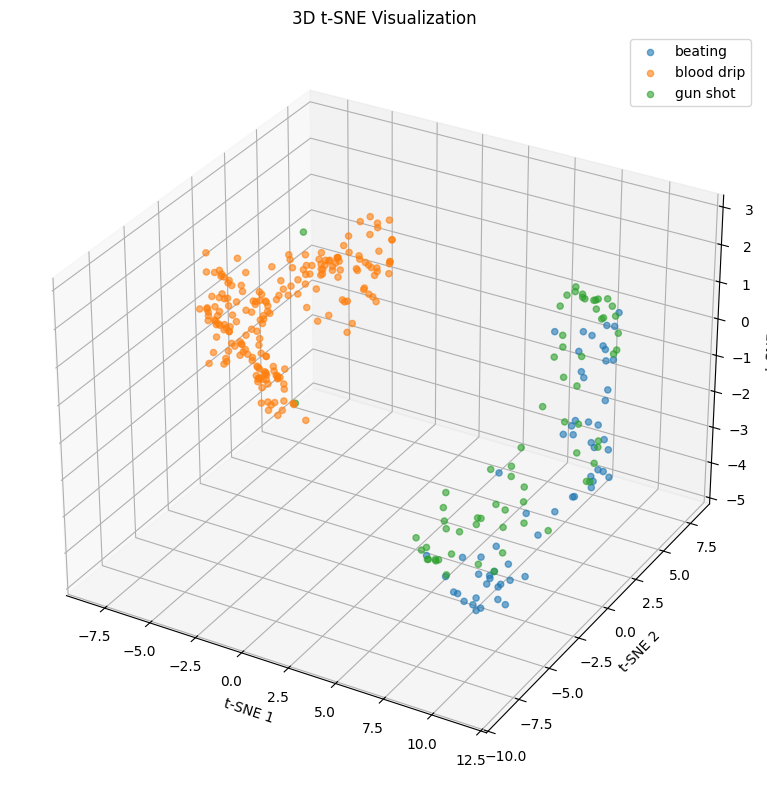

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(labels):
    mask = labels == label
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2], label=label, s=20, alpha=0.6)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('3D t-SNE Visualization')
ax.legend()

plt.tight_layout()
plt.show()

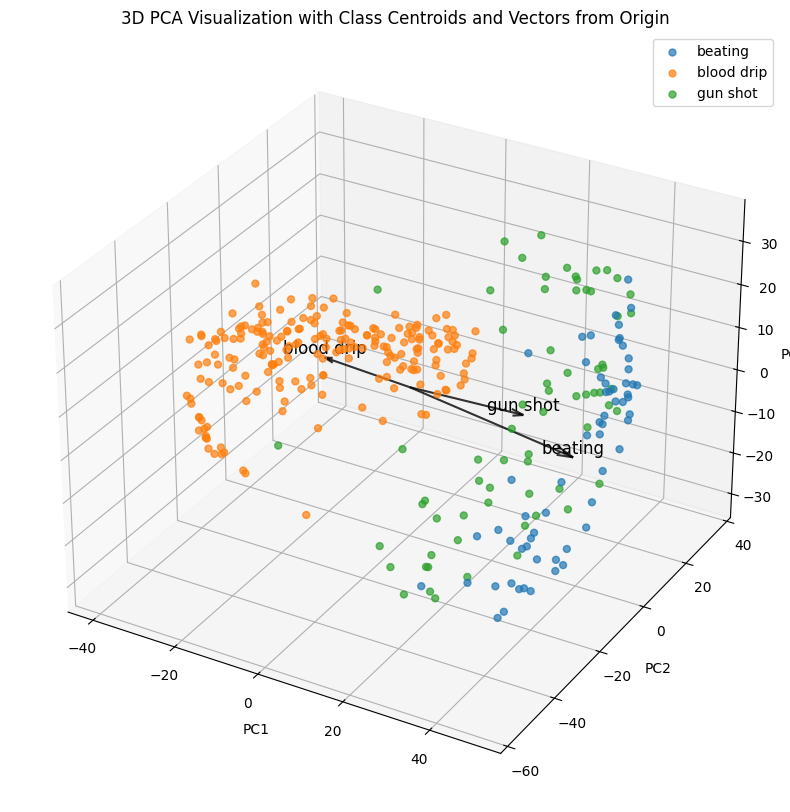

In [ ]:

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroids = {}
for cls in np.unique(labels):
    mask = labels == cls
    centroids[cls] = X_pca[mask, :].mean(axis=0)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
for cls in np.unique(labels):
    mask = labels == cls
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], s=25, label=cls, alpha=0.7)

# Draw vectors from the origin to each centroid
for cls, centroid in centroids.items():
    ax.quiver(0, 0, 0, centroid[0], centroid[1], centroid[2], color='black', alpha=0.8, arrow_length_ratio=0.1)
    ax.text(centroid[0], centroid[1], centroid[2], cls, color='black', fontsize=12, ha='center', va='bottom')
# each arow represant centers for each data points
ax.set_title("3D PCA Visualization with Class Centroids and Vectors from Origin")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend()
plt.show()

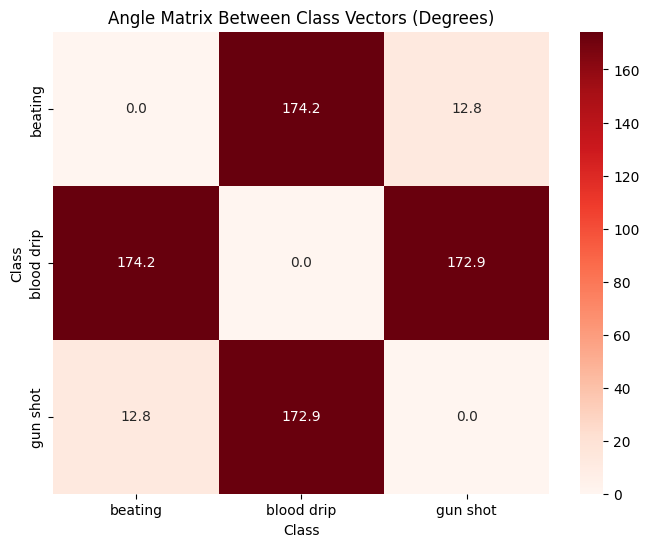

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def angle_between(v1, v2):
  v1_u = v1 / np.linalg.norm(v1)
  v2_u = v2 / np.linalg.norm(v2)
  angle = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

  return np.degrees(angle)

cls_list = list(centroids.keys())

n = len(cls_list)
angle_matrix = np.zeros((n, n))
for i, c1 in enumerate(cls_list):
  for j, c2 in enumerate(cls_list):
    if i == j:

      angle_matrix[i, j] = 0

    else:
        angle_matrix[i, j] = angle_between(centroids[c1], centroids[c2])
# Convert to DataFrame
angle_df = pd.DataFrame(angle_matrix, index=cls_list, columns=cls_list)
# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(angle_df, annot=True, cmap="Reds", fmt=".1f")
plt.title("Angle Matrix Between Class Vectors (Degrees)")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

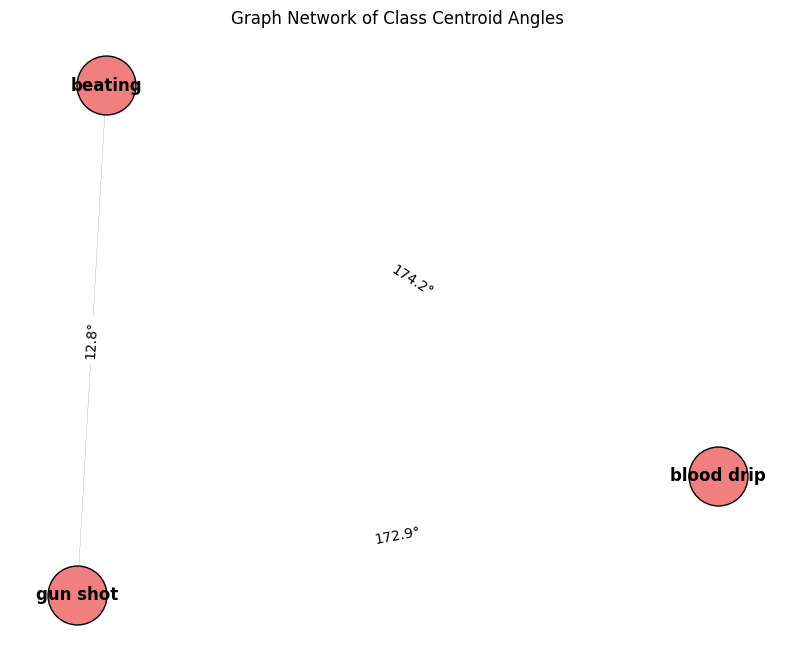

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()

for cls in cls_list:
    G.add_node(cls)

for i, c1 in enumerate(cls_list):
    for j, c2 in enumerate(cls_list):
        if i < j:
            angle = angle_df.loc[c1, c2]
            weight = 1 / (angle + 1e-6)
            G.add_edge(c1, c2, weight=weight, angle=angle)

pos = nx.spring_layout(G, weight='weight', seed=42)

plt.figure(figsize=(10, 8))

nx.draw_networkx_nodes(G, pos, node_size=1800, node_color="lightcoral", edgecolors="black")

edges = G.edges(data=True)
widths = [d['weight'] * 2 for (_, _, d) in edges]
nx.draw_networkx_edges(G, pos, width=widths, alpha=0.6)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

edge_labels = {(u, v): f"{d['angle']:.1f}°" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph Network of Class Centroid Angles")
plt.axis("off")
plt.show()


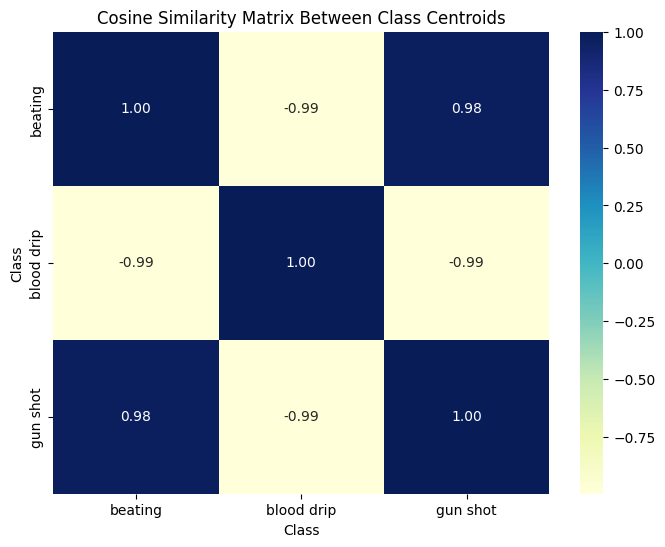

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

centroid_vectors = np.array(list(centroids.values()))
cls_list = list(centroids.keys())

# Compute cosine similarity matrix between centroids
cosine_sim_matrix = cosine_similarity(centroid_vectors)

cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=cls_list, columns=cls_list)

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cosine Similarity Matrix Between Class Centroids")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np

lda = LinearDiscriminantAnalysis(n_components=2 )
X_lda = lda.fit_transform(embeddings, labels)

print("LDA Shape:", X_lda.shape)


LDA Shape: (331, 2)


In [ ]:
lda_df = pd.DataFrame({"LD1": X_lda[:, 0],"LD2": X_lda[:, 1],"Class": labels})

import plotly.express as px

fig = px.scatter(lda_df,x="LD1",y="LD2",color="Class",title="2D LDA Projection",opacity=0.8)

fig.update_traces(marker=dict(size=7))
fig.show()


1.10. 3D Scatter Plots